In [ ]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.cuda.current_device())
print(torch.cuda.device(0))
print(torch.cuda.get_device_name(0))

True
1
0
Tesla T4


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/kaggle/input

HAM10000_images_part_1	hmnist_28_28_L.csv    hmnist_8_8_RGB.csv
HAM10000_images_part_2	hmnist_28_28_RGB.csv
HAM10000_metadata.csv	hmnist_8_8_L.csv


'dx' is short for diagnosis (for the patient)
- 'nv': 'Melanocytic nevi'
- 'mel': 'Melanoma'
- 'bkl': 'Benign keratosis-like lesions'
- 'bcc': 'Basal cell carcinoma'
- 'akiec': 'Actinic keratoses'
- 'vasc': 'Vascular lesions'
- 'df': 'Dermatofibroma'

'dx_type' is how the diagnosis was made. 
- histo        5340
- follow_up    3704
- consensus     902
- confocal       69

In [ ]:
import pandas as pd

# labels_path = "../input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv"
labels_path = "/content/drive/MyDrive/kaggle/input/HAM10000_metadata.csv"
image_labels_df = pd.read_csv(labels_path)
image_labels_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [ ]:
image_labels_df.sort_values(by="image_id")

,lesion_id,image_id,dx,dx_type,age,sex,localization
4349,HAM_0000550,ISIC_0024306,nv,follow_up,45.0,male,trunk
4263,HAM_0003577,ISIC_0024307,nv,follow_up,50.0,male,lower extremity
4217,HAM_0001477,ISIC_0024308,nv,follow_up,55.0,female,trunk
3587,HAM_0000484,ISIC_0024309,nv,follow_up,40.0,male,trunk
1451,HAM_0003350,ISIC_0024310,mel,histo,60.0,male,chest
...,...,...,...,...,...,...,...
1721,HAM_0004304,ISIC_0034316,mel,histo,85.0,male,upper extremity
1888,HAM_0006376,ISIC_0034317,mel,histo,70.0,female,lower extremity
121,HAM_0000344,ISIC_0034318,bkl,histo,55.0,male,trunk
7440,HAM_0000747,ISIC_0034319,nv,histo,30.0,male,trunk


In [ ]:
type(image_labels_df["image_id"][0])
    

str

In [ ]:
from torch.utils.data import Dataset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

def disease_to_label(l):
    if l == "akiec":
        return 0
    if l == "bcc":
        return 1
    if l == "bkl":
        return 2
    if l == "df":
        return 3
    if l == "mel":
        return 4
    if l == "nv":
        return 5
    if l == "vasc":
        return 6 

class SkinCancerDetection(Dataset):
    def __init__(self, img1, img2, csv):
        self.image_path1 = img1
        self.image_path2 = img2
        self.csv_path = csv
    def __len__(self):
        df = pd.read_csv(self.csv_path)
        return (len(df.index))
    def __getitem__(self, idx):
        image_id = "ISIC_00" + str(idx+24306)
        image_file_name = image_id + ".jpg"
        df = pd.read_csv(self.csv_path)
        label = disease_to_label(str(df.loc[df['image_id'] == image_id, 'dx'].item()))
        p1 = os.path.join(self.image_path1, image_file_name)
        p2 = os.path.join(self.image_path2, image_file_name)
        if os.path.isfile(p1):
            img = plt.imread(p1)
        if os.path.isfile(p2):
            img = plt.imread(p2)
        transform = transforms.ToTensor()
        img = transform(img)
        transform = transforms.Resize((32, 32))
        img = transform(img)
        
        return img, label

In [ ]:
# dataset = SkinCancerDetection('/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1', '/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2', '/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv')
dataset = SkinCancerDetection('/content/drive/MyDrive/kaggle/input/HAM10000_images_part_1','/content/drive/MyDrive/kaggle/input/HAM10000_images_part_2', '/content/drive/MyDrive/kaggle/input/HAM10000_metadata.csv')

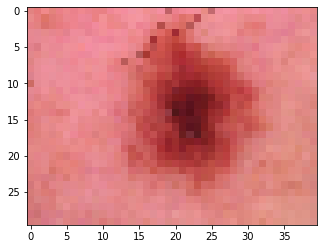

In [ ]:
import pandas as pd
import os
idx = 0
image_id = "ISIC_00" + str(idx+24306)
image_file_name = image_id + ".jpg"
# df = pd.read_csv('/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv')
df = pd.read_csv('/content/drive/MyDrive/kaggle/input/HAM10000_metadata.csv')
label = disease_to_label(str(df.loc[df['image_id'] == image_id, 'dx'].item()))
# p1 = os.path.join('/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1', image_file_name)
# p2 = os.path.join('/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2', image_file_name)
p1 = os.path.join('/content/drive/MyDrive/kaggle/input/HAM10000_images_part_1', image_file_name)
p2 = os.path.join('/content/drive/MyDrive/kaggle/input/HAM10000_images_part_2', image_file_name)
if os.path.isfile(p1):
    img = plt.imread(p1)
if os.path.isfile(p2):
    img = plt.imread(p2)
transform = transforms.ToTensor()
img = transform(img)
transform = transforms.Resize((30, 40))
img = transform(img)

img.shape
plt.figure()
plt.imshow(img.permute(1, 2, 0))

In [ ]:
len(dataset)

10015

<class 'torch.Tensor'>


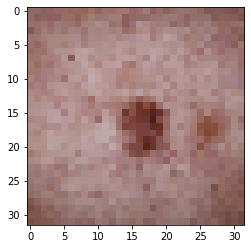

tensor(5)


In [ ]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split
from torch.utils.data import DataLoader

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

random_seed = 42
torch.manual_seed(random_seed)

batch_size = 128

val_size = int(0.2*len(dataset))
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=2, pin_memory=True)
valid_dl = DataLoader(val_ds, batch_size*2, num_workers=2, pin_memory=True)

plt.figure()

for image, label in train_dl:
    plt.imshow(image[0].permute(2, 1, 0))
    print(type(image[0]))
    plt.show()
    print(label[0])
    break

In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)
device = get_default_device()
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

In [ ]:
import os
import torch
import torchvision
import tarfile
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))

In [ ]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.conv1 = conv_block(in_channels, 64)
        self.conv2 = conv_block(64, 128, pool=True)
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128))
        
        self.conv3 = conv_block(128, 256, pool=True)
        self.conv4 = conv_block(256, 512, pool=True)
        self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))
        
        self.classifier = nn.Sequential(nn.MaxPool2d(4), 
                                        nn.Flatten(), 
                                        nn.Dropout(0.2),
                                        nn.Linear(512, num_classes))
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out


In [ ]:
model = to_device(ResNet9(3, 7), device)
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

In [ ]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [ ]:
history = [evaluate(model, valid_dl)]
history

[{'val_acc': 0.1106894239783287, 'val_loss': 1.946382999420166}]

In [ ]:
epochs = 8
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [ ]:
%%time
history += fit_one_cycle(epochs, max_lr, model, train_dl, valid_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

Epoch [0], last_lr: 0.00390, train_loss: 0.9926, val_loss: 0.8164, val_acc: 0.7137
Epoch [1], last_lr: 0.00935, train_loss: 0.8608, val_loss: 0.9854, val_acc: 0.6691
Epoch [2], last_lr: 0.00972, train_loss: 0.8842, val_loss: 5.0420, val_acc: 0.6375
Epoch [3], last_lr: 0.00812, train_loss: 0.7982, val_loss: 0.7837, val_acc: 0.7147
Epoch [4], last_lr: 0.00556, train_loss: 0.7300, val_loss: 0.8337, val_acc: 0.7136
Epoch [5], last_lr: 0.00283, train_loss: 0.6659, val_loss: 0.7054, val_acc: 0.7360
Epoch [6], last_lr: 0.00077, train_loss: 0.6182, val_loss: 0.6642, val_acc: 0.7679
Epoch [7], last_lr: 0.00000, train_loss: 0.5802, val_loss: 0.6293, val_acc: 0.7688
CPU times: user 19 s, sys: 3.47 s, total: 22.4 s
Wall time: 28min 29s


In [ ]:
epochs = 4
max_lr = 0.005
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

history += fit_one_cycle(epochs, max_lr, model, train_dl, valid_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

Epoch [0], last_lr: 0.00467, train_loss: 0.6569, val_loss: 0.9258, val_acc: 0.7127
Epoch [1], last_lr: 0.00406, train_loss: 0.7185, val_loss: 0.6909, val_acc: 0.7390
Epoch [2], last_lr: 0.00142, train_loss: 0.6477, val_loss: 0.6475, val_acc: 0.7587
Epoch [3], last_lr: 0.00000, train_loss: 0.5697, val_loss: 0.6247, val_acc: 0.7745


In [ ]:
epochs = 4
max_lr = 0.001
grad_clip = 0.1
weight_decay = 1e-3
opt_func = torch.optim.Adam

history += fit_one_cycle(epochs, max_lr, model, train_dl, valid_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

Epoch [0], last_lr: 0.00093, train_loss: 0.5520, val_loss: 0.6446, val_acc: 0.7560
Epoch [1], last_lr: 0.00081, train_loss: 0.5752, val_loss: 0.6363, val_acc: 0.7682
Epoch [2], last_lr: 0.00028, train_loss: 0.5417, val_loss: 0.5936, val_acc: 0.7789
Epoch [3], last_lr: 0.00000, train_loss: 0.4708, val_loss: 0.5979, val_acc: 0.7824


In [ ]:
epochs = 4
max_lr = 0.00001
grad_clip = 0.1
weight_decay = 1e-3
opt_func = torch.optim.Adam

history += fit_one_cycle(epochs, max_lr, model, train_dl, valid_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

Epoch [0], last_lr: 0.00001, train_loss: 0.4587, val_loss: 0.6011, val_acc: 0.7864
Epoch [1], last_lr: 0.00001, train_loss: 0.4528, val_loss: 0.5989, val_acc: 0.7825
Epoch [2], last_lr: 0.00000, train_loss: 0.4477, val_loss: 0.5992, val_acc: 0.7845
Epoch [3], last_lr: 0.00000, train_loss: 0.4447, val_loss: 0.5984, val_acc: 0.7855


In [ ]:
torch.save(model.state_dict(), 'hmnist-resnet9-78.pth')

In [ ]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs')
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs')

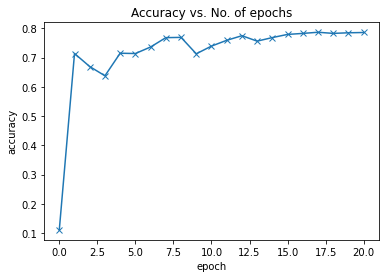

In [ ]:
plot_accuracies(history)

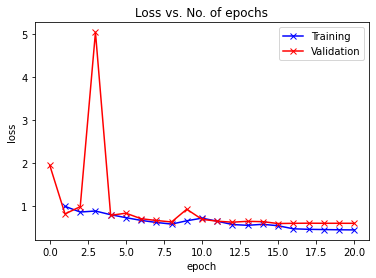

In [ ]:
plot_losses(history)